In [57]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [32]:
dataset = MNIST(root='data/', download=True)

In [33]:
len(dataset)

60000

In [34]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [35]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FD6A9B1EEF0>, 5)

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 3


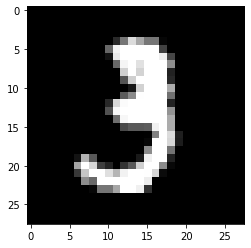

In [37]:
image,label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label )

In [38]:
import torchvision.transforms as transforms

In [39]:
dataset = MNIST(root='data/',
                train =True,
                transform=transforms.ToTensor())

In [40]:
img_tensor, label = dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


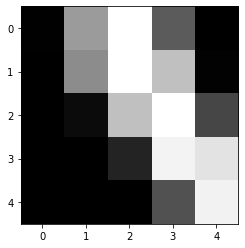

In [41]:
plt.imshow(img_tensor[0,10:15, 10:15], cmap='gray');

In [42]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [43]:
from torch.utils.data import DataLoader

batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [44]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [45]:
print(model.weight.shape)

torch.Size([10, 784])


In [46]:
model.weight

Parameter containing:
tensor([[-0.0168,  0.0257,  0.0318,  ..., -0.0175,  0.0197, -0.0146],
        [ 0.0281, -0.0323,  0.0292,  ...,  0.0052, -0.0336,  0.0249],
        [-0.0186, -0.0236,  0.0124,  ...,  0.0059,  0.0187, -0.0149],
        ...,
        [ 0.0283, -0.0269, -0.0319,  ..., -0.0099,  0.0042, -0.0045],
        [-0.0073,  0.0163,  0.0090,  ..., -0.0129,  0.0318,  0.0159],
        [ 0.0206,  0.0097, -0.0004,  ..., -0.0306,  0.0198, -0.0225]],
       requires_grad=True)

In [47]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0239, -0.0109,  0.0301, -0.0173, -0.0324, -0.0127, -0.0086,  0.0209,
         0.0135,  0.0057], requires_grad=True)

In [48]:
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images)
  print(outputs)
  break


tensor([8, 3, 5, 0, 7, 0, 2, 3, 7, 8, 1, 1, 0, 1, 0, 3, 3, 3, 6, 5, 4, 7, 2, 3,
        2, 9, 1, 6, 1, 6, 8, 8, 6, 6, 2, 1, 5, 5, 8, 3, 2, 9, 8, 4, 6, 0, 1, 1,
        9, 0, 8, 8, 4, 1, 5, 4, 7, 0, 1, 3, 1, 5, 1, 7, 0, 1, 7, 9, 3, 0, 6, 2,
        1, 9, 2, 1, 8, 6, 1, 1, 4, 4, 0, 5, 3, 0, 3, 5, 0, 9, 3, 1, 7, 5, 7, 1,
        7, 8, 5, 0, 2, 1, 8, 1, 2, 9, 6, 9, 0, 3, 4, 3, 5, 3, 9, 2, 3, 4, 5, 5,
        6, 7, 6, 2, 5, 3, 0, 6])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [49]:
images.shape

torch.Size([128, 1, 28, 28])

In [50]:
images.reshape(128,784).shape

torch.Size([128, 784])

In [51]:
class MnistModel(nn.Module):
    def __init__(self):
      super().__init__()
      self.linear = nn.Linear(input_size, num_classes)

    def forward(self,xb):
      xb = xb.reshape(-1, 784)
      out = self.linear(xb)
      return out

model = MnistModel()

In [52]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0024, -0.0170, -0.0183,  ...,  0.0207,  0.0261,  0.0071],
         [-0.0305,  0.0147,  0.0097,  ...,  0.0301,  0.0121, -0.0240],
         [-0.0149, -0.0296, -0.0272,  ..., -0.0194,  0.0123,  0.0171],
         ...,
         [ 0.0201, -0.0100,  0.0083,  ..., -0.0162,  0.0072,  0.0328],
         [-0.0209, -0.0055, -0.0337,  ..., -0.0049, -0.0089, -0.0016],
         [ 0.0299, -0.0163,  0.0072,  ..., -0.0076, -0.0159, -0.0060]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0242,  0.0239,  0.0006, -0.0313, -0.0074,  0.0086, -0.0264,  0.0184,
          0.0219, -0.0187], requires_grad=True)]

In [53]:
for images, labels in train_loader:
  outputs = model(images)
  break

print('outputs.shape: ', outputs.shape)
print('Sample outputs: \n', outputs[:2].data)

outputs.shape:  torch.Size([128, 10])
Sample outputs: 
 tensor([[-0.2742,  0.2847,  0.1792,  0.1487,  0.2939,  0.4726, -0.0379,  0.0444,
          0.1572, -0.0007],
        [-0.2195,  0.5749,  0.3289, -0.1866,  0.0665,  0.4205,  0.0470,  0.0503,
          0.2557,  0.0519]])


In [54]:
import torch.nn.functional as F

In [55]:
outputs[:2]

tensor([[-0.2742,  0.2847,  0.1792,  0.1487,  0.2939,  0.4726, -0.0379,  0.0444,
          0.1572, -0.0007],
        [-0.2195,  0.5749,  0.3289, -0.1866,  0.0665,  0.4205,  0.0470,  0.0503,
          0.2557,  0.0519]], grad_fn=<SliceBackward>)

In [58]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0657, 0.1149, 0.1034, 0.1003, 0.1160, 0.1387, 0.0832, 0.0904, 0.1011,
         0.0864],
        [0.0678, 0.1501, 0.1174, 0.0701, 0.0903, 0.1287, 0.0886, 0.0889, 0.1091,
         0.0890]])
Sum:  1.0


In [59]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([5, 1, 1, 5, 5, 2, 4, 5, 5, 1, 1, 5, 1, 5, 1, 5, 1, 2, 8, 2, 4, 5, 1, 4,
        5, 1, 0, 5, 5, 2, 8, 5, 4, 2, 1, 1, 1, 5, 1, 2, 5, 1, 5, 1, 1, 5, 1, 5,
        5, 1, 1, 1, 8, 5, 5, 1, 1, 1, 1, 2, 1, 8, 5, 1, 1, 5, 5, 1, 1, 9, 2, 5,
        4, 8, 1, 1, 4, 1, 1, 5, 2, 1, 5, 1, 5, 4, 5, 5, 1, 1, 1, 5, 1, 5, 8, 5,
        5, 1, 5, 4, 5, 5, 1, 7, 1, 8, 5, 1, 1, 5, 4, 5, 1, 1, 1, 8, 5, 5, 1, 1,
        1, 8, 2, 2, 1, 1, 1, 4])
tensor([0.1387, 0.1501, 0.1425, 0.1405, 0.1354, 0.1377, 0.1199, 0.1464, 0.1437,
        0.1276, 0.1398, 0.1205, 0.1406, 0.1294, 0.1511, 0.1413, 0.1486, 0.1210,
        0.1208, 0.1248, 0.1316, 0.1300, 0.1411, 0.1241, 0.1296, 0.1262, 0.1170,
        0.1280, 0.1366, 0.1296, 0.1186, 0.1228, 0.1232, 0.1217, 0.1214, 0.1349,
        0.1510, 0.1178, 0.1186, 0.1282, 0.1228, 0.1418, 0.1205, 0.1469, 0.1404,
        0.1273, 0.1277, 0.1296, 0.1380, 0.1443, 0.1276, 0.1517, 0.1383, 0.1257,
        0.1170, 0.1355, 0.1194, 0.1146, 0.1269, 0.1301, 0.1519, 0.1218, 0.1212,
       

In [60]:
labels

tensor([5, 9, 5, 4, 3, 3, 5, 8, 0, 8, 6, 0, 3, 7, 8, 7, 4, 1, 2, 5, 5, 6, 7, 4,
        6, 5, 4, 7, 6, 4, 9, 5, 8, 1, 1, 4, 5, 0, 3, 3, 0, 2, 0, 9, 7, 1, 4, 3,
        3, 0, 6, 9, 0, 4, 1, 2, 1, 1, 9, 6, 3, 7, 8, 8, 9, 0, 0, 1, 7, 5, 5, 6,
        0, 3, 9, 3, 4, 7, 2, 0, 7, 1, 7, 5, 2, 7, 7, 2, 1, 3, 5, 7, 8, 5, 0, 6,
        6, 2, 8, 2, 8, 6, 2, 5, 7, 9, 1, 2, 9, 5, 0, 3, 6, 9, 1, 0, 9, 4, 7, 8,
        2, 6, 1, 8, 9, 1, 7, 0])

In [61]:
outputs[:2]

tensor([[-0.2742,  0.2847,  0.1792,  0.1487,  0.2939,  0.4726, -0.0379,  0.0444,
          0.1572, -0.0007],
        [-0.2195,  0.5749,  0.3289, -0.1866,  0.0665,  0.4205,  0.0470,  0.0503,
          0.2557,  0.0519]], grad_fn=<SliceBackward>)

In [62]:
torch.sum(preds == labels)

tensor(14)

In [63]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [64]:
accuracy(outputs, labels)

tensor(0.1094)

In [65]:
probs

tensor([[0.0657, 0.1149, 0.1034,  ..., 0.0904, 0.1011, 0.0864],
        [0.0678, 0.1501, 0.1174,  ..., 0.0889, 0.1091, 0.0890],
        [0.0808, 0.1425, 0.0987,  ..., 0.0945, 0.1157, 0.1057],
        ...,
        [0.0849, 0.1315, 0.1125,  ..., 0.1007, 0.1042, 0.0963],
        [0.1069, 0.1382, 0.1009,  ..., 0.0784, 0.0950, 0.1027],
        [0.0705, 0.0946, 0.0931,  ..., 0.0981, 0.1143, 0.0815]],
       grad_fn=<SoftmaxBackward>)

In [66]:
outputs

tensor([[-2.7422e-01,  2.8472e-01,  1.7922e-01,  ...,  4.4355e-02,
          1.5719e-01, -6.5837e-04],
        [-2.1948e-01,  5.7490e-01,  3.2885e-01,  ...,  5.0274e-02,
          2.5570e-01,  5.1926e-02],
        [-3.4180e-02,  5.3254e-01,  1.6500e-01,  ...,  1.2228e-01,
          3.2467e-01,  2.3403e-01],
        ...,
        [-1.2611e-01,  3.1172e-01,  1.5598e-01,  ...,  4.5152e-02,
          7.8969e-02, -2.2820e-04],
        [ 1.6926e-01,  4.2650e-01,  1.1204e-01,  ..., -1.4032e-01,
          5.1151e-02,  1.2950e-01],
        [-1.6848e-01,  1.2472e-01,  1.0915e-01,  ...,  1.6176e-01,
          3.1467e-01, -2.3877e-02]], grad_fn=<AddmmBackward>)

In [69]:
loss_fn = F.cross_entropy

In [70]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3549, grad_fn=<NllLossBackward>)


In [71]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] 
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [72]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [73]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [74]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.1048259511590004, 'val_loss': 2.3117315769195557}

In [75]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9384, val_acc: 0.6346
Epoch [1], val_loss: 1.6697, val_acc: 0.7205
Epoch [2], val_loss: 1.4700, val_acc: 0.7581
Epoch [3], val_loss: 1.3195, val_acc: 0.7812
Epoch [4], val_loss: 1.2037, val_acc: 0.7959


In [76]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1127, val_acc: 0.8066
Epoch [1], val_loss: 1.0398, val_acc: 0.8155
Epoch [2], val_loss: 0.9801, val_acc: 0.8216
Epoch [3], val_loss: 0.9304, val_acc: 0.8257
Epoch [4], val_loss: 0.8883, val_acc: 0.8292


In [77]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8524, val_acc: 0.8315
Epoch [1], val_loss: 0.8212, val_acc: 0.8357
Epoch [2], val_loss: 0.7939, val_acc: 0.8398
Epoch [3], val_loss: 0.7699, val_acc: 0.8424
Epoch [4], val_loss: 0.7484, val_acc: 0.8447


In [78]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7292, val_acc: 0.8471
Epoch [1], val_loss: 0.7119, val_acc: 0.8494
Epoch [2], val_loss: 0.6962, val_acc: 0.8500
Epoch [3], val_loss: 0.6818, val_acc: 0.8519
Epoch [4], val_loss: 0.6687, val_acc: 0.8534


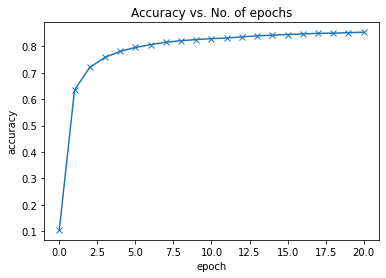

In [79]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [80]:
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


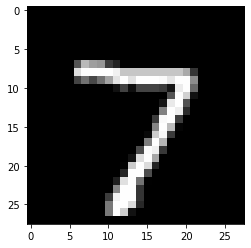

In [82]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [85]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 0 , Predicted: 0


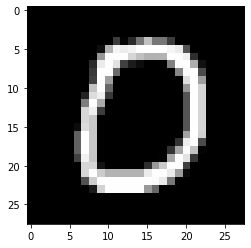

In [86]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 4


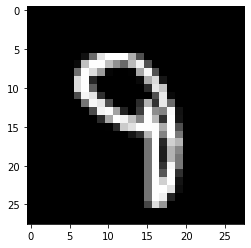

In [87]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [88]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.86181640625, 'val_loss': 0.640030026435852}